In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
df = pd.read_csv(r'application.csv')

In [3]:
df.columns.tolist()

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

In [4]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,384575,0,Cash loans,M,Y,N,2,207000.0,465457.5,52641.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
1,214010,0,Cash loans,F,Y,Y,0,247500.0,1281712.5,48946.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0
2,142232,0,Cash loans,F,Y,N,0,202500.0,495000.0,39109.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0
3,389171,0,Cash loans,F,N,Y,0,247500.0,254700.0,24939.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,283617,0,Cash loans,M,N,Y,0,112500.0,308133.0,15862.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0


In [5]:
df['SK_ID_CURR'].nunique()/df.shape[0]

1.0

In [6]:
# level of data - SK_ID_CURR
# Sampling the data - Stratified by Target
df['TARGET'].mean()
# In out sample also 8% Default rate should be there.

0.08155567117585848

### 1. Brainstorming

In [8]:
# Brainstorming:
# 1. Loan type wise default rate
# 2. AMT_INCOME_TOTAL
# 3. AMT_ANNUITY
# 4. Occupation type wise default
# 5. Flag own car wise default
# 6. AMT_ANNUITY
# 7. REGION_POPULATION_RELATIVE

In [9]:
# Brainstorming:
# 1. Loan type wise default rate
    # NAME_CONTRACT_TYPE
# 2. AMT_INCOME_TOTAL
    # AMT_INCOME_TOTAL
# 3. AMT_ANNUITY
    # AMT_ANNUITY
# 4. Occupation type wise default
    # OCCUPATION_TYPE
# 5. Flag own car wise default
    # FLAG_OWN_CAR
# 6. DAYS_BIRTH
    # DAYS_BIRTH
# 7. REGION_POPULATION_RELATIVE
    # REGION_POPULATION_RELATIVE
    
    

### 2. Univariate Analysis

In [11]:
# NAME_CONTRACT_TYPE


OCCUPATION_TYPE
Laborers                 0.262201
Sales staff              0.153665
Core staff               0.132372
Managers                 0.100528
Drivers                  0.087809
High skill tech staff    0.050499
Accountants              0.048332
Medicine staff           0.040795
Security staff           0.031845
Cooking staff            0.028924
Cleaning staff           0.020539
Private service staff    0.012531
Low-skill Laborers       0.010646
Waiters/barmen staff     0.005559
Secretaries              0.005464
IT staff                 0.002921
Realty agents            0.002921
HR staff                 0.002450
Name: proportion, dtype: float64

<Figure size 1200x600 with 0 Axes>

<BarContainer object of 18 artists>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'Laborers'),
  Text(1, 0, 'Sales staff'),
  Text(2, 0, 'Core staff'),
  Text(3, 0, 'Managers'),
  Text(4, 0, 'Drivers'),
  Text(5, 0, 'High skill tech staff'),
  Text(6, 0, 'Accountants'),
  Text(7, 0, 'Medicine staff'),
  Text(8, 0, 'Security staff'),
  Text(9, 0, 'Cooking staff'),
  Text(10, 0, 'Cleaning staff'),
  Text(11, 0, 'Private service staff'),
  Text(12, 0, 'Low-skill Laborers'),
  Text(13, 0, 'Waiters/barmen staff'),
  Text(14, 0, 'Secretaries'),
  Text(15, 0, 'IT staff'),
  Text(16, 0, 'Realty agents'),
  Text(17, 0, 'HR staff')])

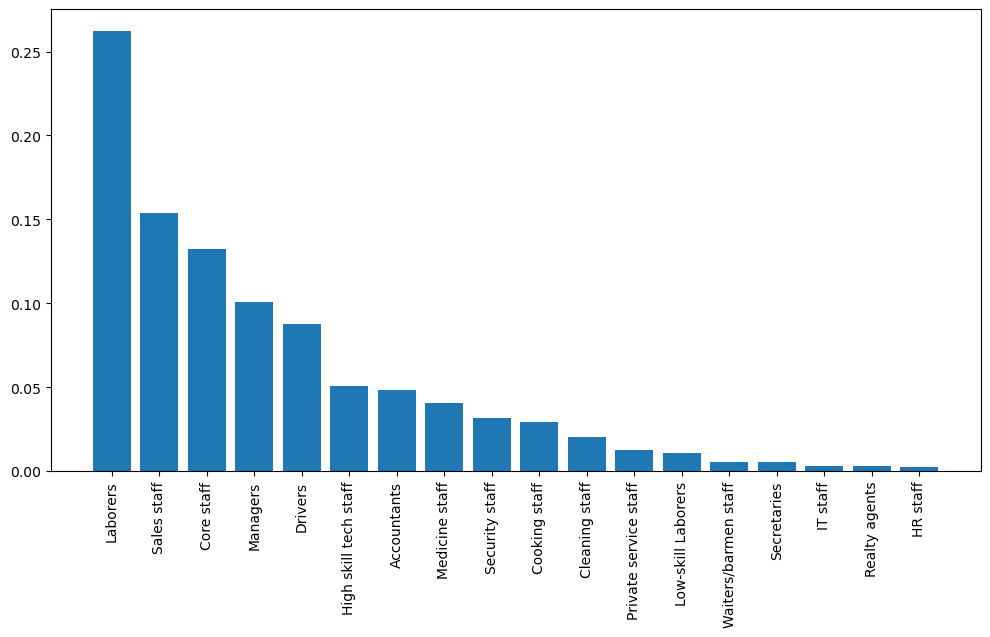

In [12]:
ds = df["OCCUPATION_TYPE"].value_counts(normalize = True)
ds
plt.figure(figsize = (12,6))
plt.bar(ds.index, ds)
plt.xticks(rotation = 90)

In [13]:
# Same thing for columns so let's use functions
def plot_cat(df, col_name):
    ds = df[col_name].value_counts(normalize = True)
    plt.figure(figsize = (12,6))
    plt.bar(ds.index, ds)
    plt.xticks(rotation = 90)
    return ds

FLAG_OWN_CAR
N    0.662006
Y    0.337994
Name: proportion, dtype: float64

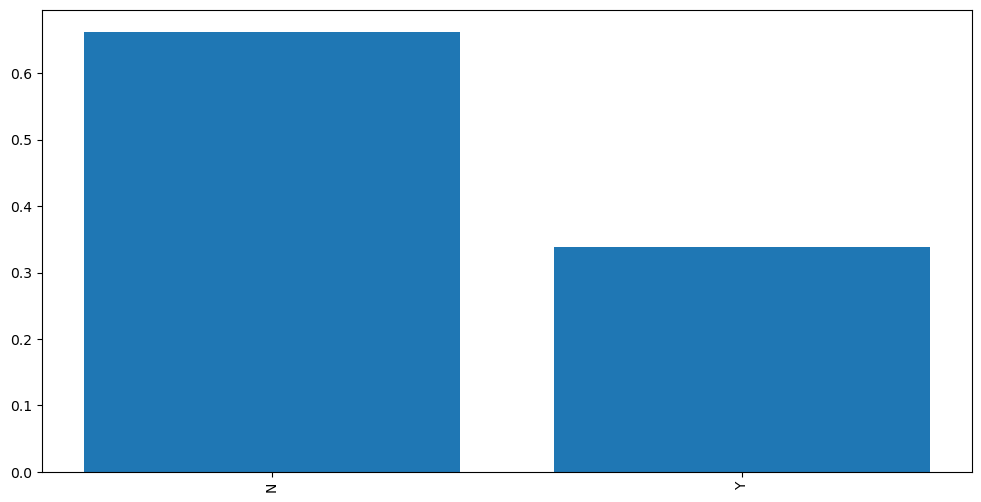

In [14]:
plot_cat(df, 'FLAG_OWN_CAR')

(-25197, -7694)

(69.03287671232877, 21.07945205479452)

<Figure size 1600x900 with 0 Axes>

(array([ 601., 1399., 1532., 1696., 1687., 2004., 2012., 1907., 1767.,
         771.]),
 array([-25197. , -23446.7, -21696.4, -19946.1, -18195.8, -16445.5,
        -14695.2, -12944.9, -11194.6,  -9444.3,  -7694. ]),
 <BarContainer object of 10 artists>)

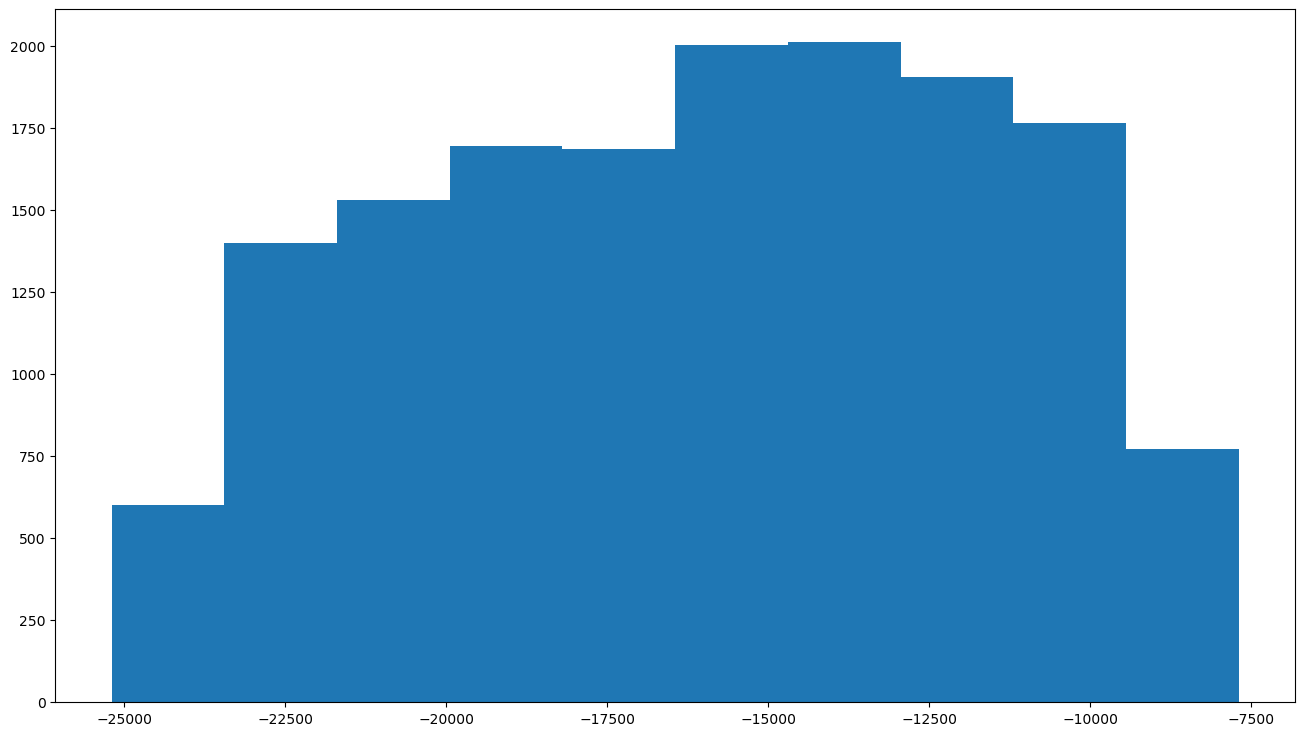

In [15]:
# DAYS_BIRTH
import seaborn as sns
df['DAYS_BIRTH'].min(), df['DAYS_BIRTH'].max()
-1*df['DAYS_BIRTH'].min()/365, -1*df['DAYS_BIRTH'].max()/365
# 69 years is the max age and 21 years is the min age in the data
plt.figure(figsize = (16,9))
plt.hist(df['DAYS_BIRTH'])
plt.show()



<Figure size 1200x600 with 0 Axes>

<Axes: ylabel='DAYS_BIRTH'>

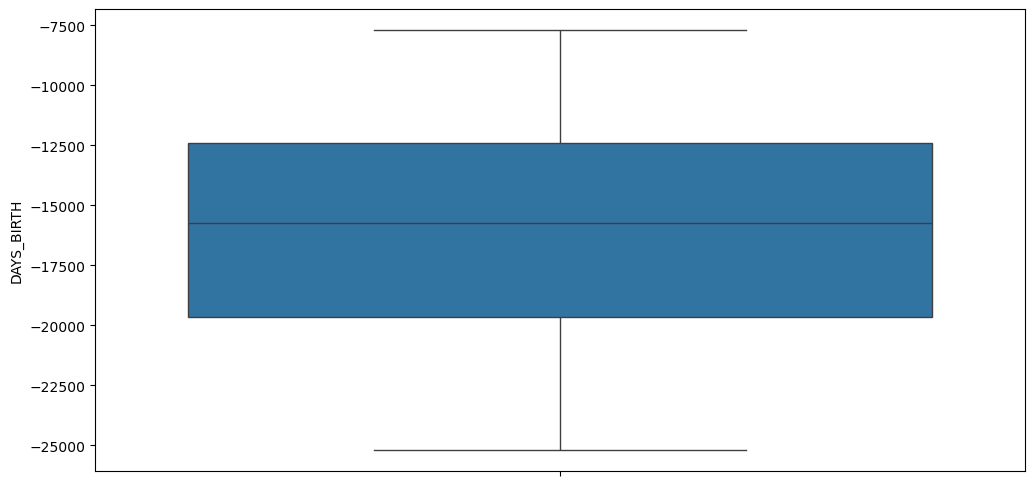

In [16]:
plt.figure(figsize = (12,6))
sns.boxplot(df['DAYS_BIRTH'])

In [17]:
df['age'] = (df['DAYS_BIRTH']*-1)/365
df['age'] = np.round(df['age'], 0)
df['age']

0        36.0
1        40.0
2        49.0
3        54.0
4        56.0
         ... 
15371    26.0
15372    52.0
15373    40.0
15374    52.0
15375    23.0
Name: age, Length: 15376, dtype: float64

age
39.0    0.029982
28.0    0.029982
43.0    0.029006
30.0    0.027706
37.0    0.027575
32.0    0.027510
42.0    0.027380
41.0    0.027380
44.0    0.026990
40.0    0.026665
36.0    0.026340
35.0    0.026275
38.0    0.026145
33.0    0.025819
34.0    0.025299
31.0    0.024584
53.0    0.024519
47.0    0.024259
52.0    0.023283
45.0    0.022893
46.0    0.022828
49.0    0.022633
29.0    0.022438
55.0    0.022307
51.0    0.022112
59.0    0.022047
54.0    0.022047
48.0    0.021852
27.0    0.021787
50.0    0.021657
61.0    0.021267
56.0    0.021137
57.0    0.020747
60.0    0.020291
58.0    0.019121
63.0    0.019056
62.0    0.017885
64.0    0.015999
26.0    0.014373
65.0    0.014048
25.0    0.013528
24.0    0.012097
23.0    0.010991
66.0    0.007869
67.0    0.006569
22.0    0.006309
68.0    0.004878
21.0    0.001561
69.0    0.000976
Name: proportion, dtype: float64

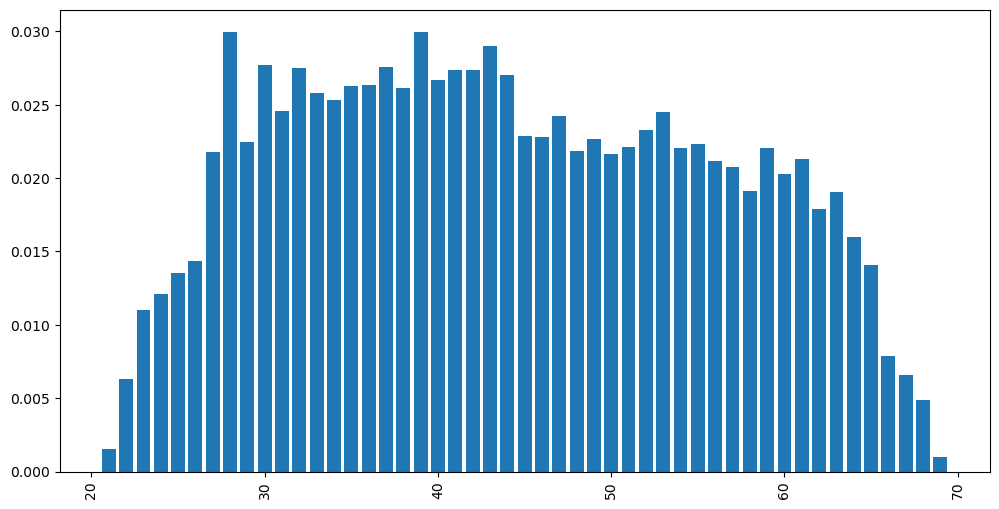

In [18]:
plot_cat(df, 'age')

count     15375.000000
mean      27076.127707
std       14493.183809
min        1980.000000
25%       16542.000000
50%       24885.000000
75%       34492.500000
max      230161.500000
Name: AMT_ANNUITY, dtype: float64

1

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='AMT_ANNUITY', ylabel='Count'>

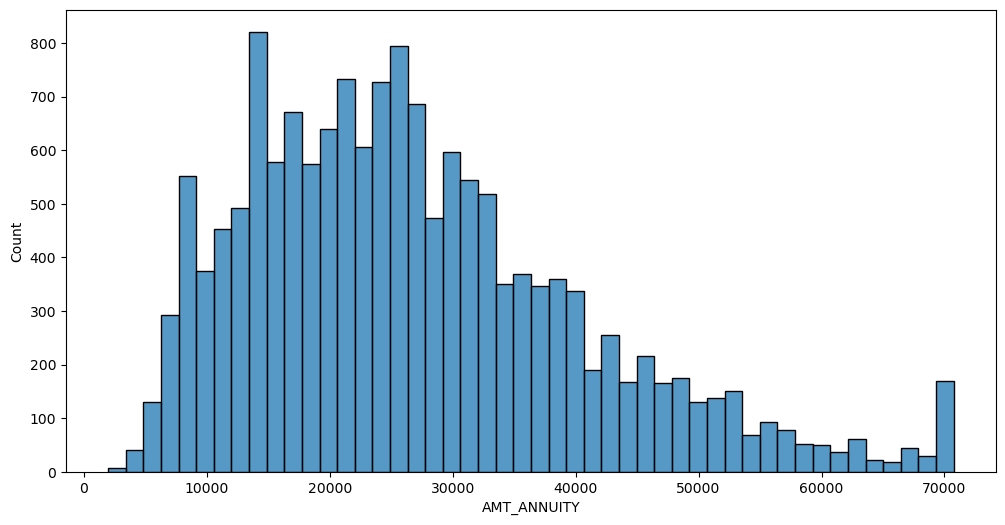

In [19]:
 # AMT_ANNUITY

df['AMT_ANNUITY'].describe()
df['AMT_ANNUITY'].isnull().sum()
plt.figure(figsize = (12,6))
sns.histplot(df['AMT_ANNUITY'].clip(upper= df['AMT_ANNUITY'].quantile(0.99)))


<Axes: ylabel='AMT_ANNUITY'>

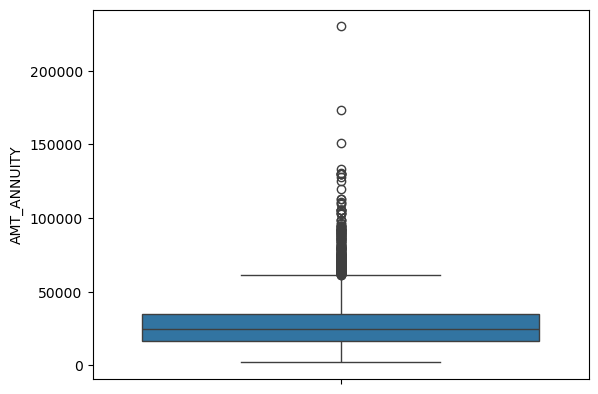

In [20]:
sns.boxplot(df['AMT_ANNUITY'])
# Outliers in df['AMT_ANNUITY']

In [21]:
def continuous_analysis(df, col_name, q = 0.99):
    print(df[col_name].isnull().sum())
    plt.figure(figsize = (16,9))
    plt.subplot(2,1,1)
    sns.histplot(df[col_name].clip(upper= df[col_name].quantile(q)))
    plt.subplot(2,1,2)
    sns.boxplot(df[col_name])
    return df[col_name].describe()

0


count    1.537600e+04
mean     1.758758e+05
std      9.470044e+05
min      2.700000e+04
25%      1.125000e+05
50%      1.485000e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

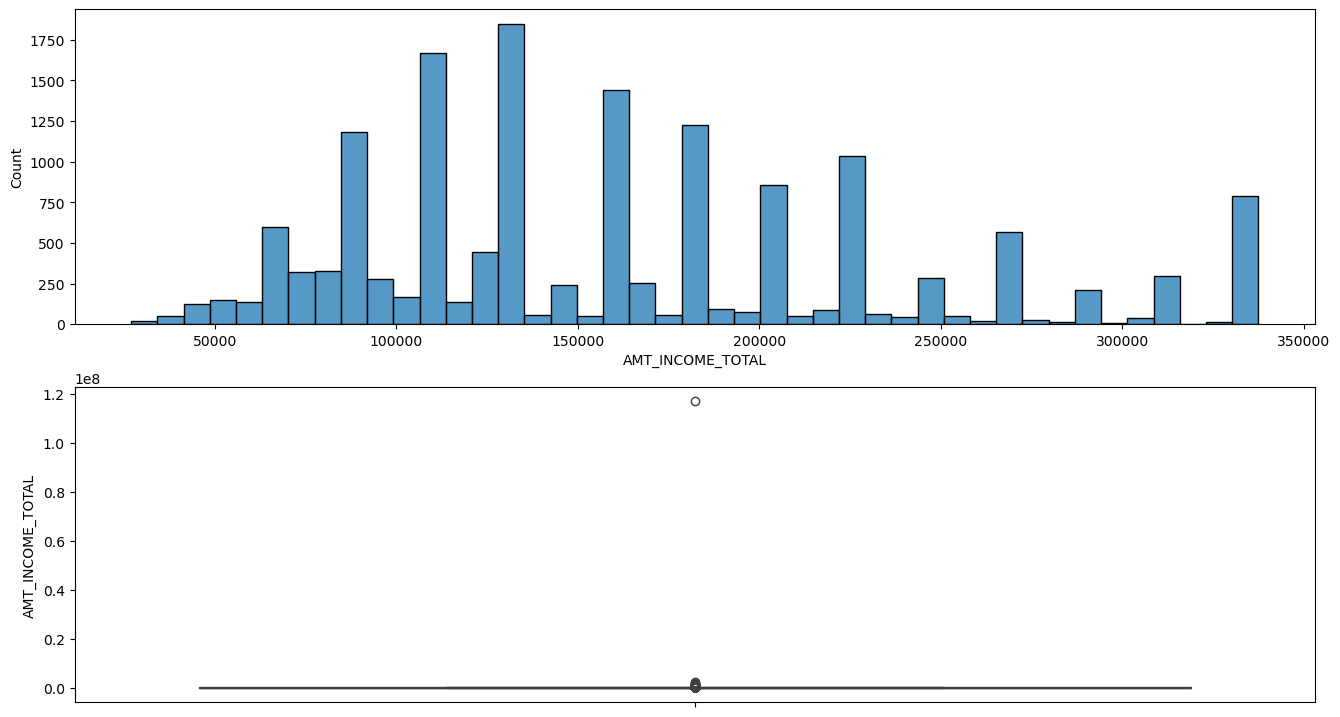

In [22]:
continuous_analysis(df, 'AMT_INCOME_TOTAL', q = 0.95)

0


count    15376.000000
mean         0.020977
std          0.014001
min          0.000533
25%          0.010006
50%          0.018850
75%          0.028663
max          0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64

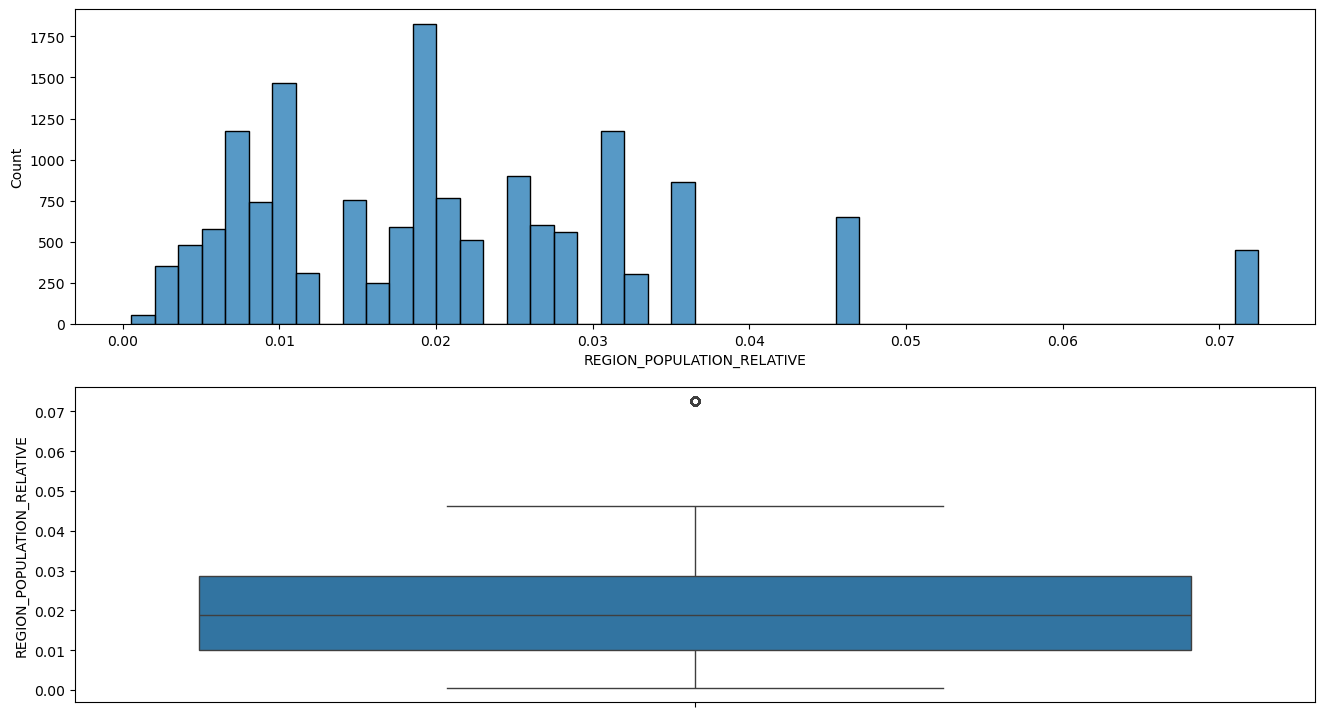

In [23]:
continuous_analysis(df, 'REGION_POPULATION_RELATIVE', q = 0.99)

In [24]:
# Home work
# AMT_CREDIT
# DAYS_EMPLOYED
# NAME_FAMILY_STATUS
# NAME_EDUCATION_TYPE

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='years_employed'>

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44],
 [Text(0, 0, '1.0'),
  Text(1, 0, '2.0'),
  Text(2, 0, '3.0'),
  Text(3, 0, '4.0'),
  Text(4, 0, '5.0'),
  Text(5, 0, '6.0'),
  Text(6, 0, '7.0'),
  Text(7, 0, '8.0'),
  Text(8, 0, '9.0'),
  Text(9, 0, '10.0'),
  Text(10, 0, '11.0'),
  Text(11, 0, '12.0'),
  Text(12, 0, '13.0'),
  Text(13, 0, '14.0'),
  Text(14, 0, '15.0'),
  Text(15, 0, '16.0'),
  Text(16, 0, '17.0'),
  Text(17, 0, '18.0'),
  Text(18, 0, '19.0'),
  Text(19, 0, '20.0'),
  Text(20, 0, '21.0'),
  Text(21, 0, '22.0'),
  Text(22, 0, '23.0'),
  Text(23, 0, '24.0'),
  Text(24, 0, '25.0'),
  Text(25, 0, '26.0'),
  Text(26, 0, '27.0'),
  Text(27, 0, '28.0'),
  Text(28, 0, '29.0'),
  Text(29, 0, '30.0'),
  Text(30, 0, '31.0'),
  Text(31, 0, '32.0'),
  Text(32, 0, '33.0'),

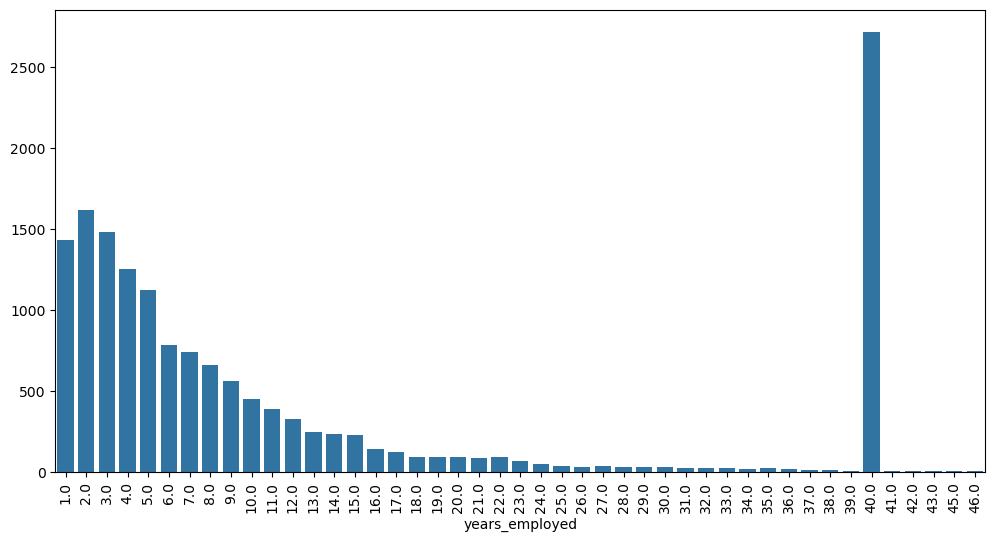

In [41]:
# DAYS_EMPLOYED
df['years_employed'] = (-1*df['DAYS_EMPLOYED'])/365
df['years_employed'] = np.ceil(np.where(df['NAME_INCOME_TYPE']== 'Pensioner', 40, df['years_employed']))
plt.figure(figsize = (12,6))
agg = df['years_employed'].value_counts()
sns.barplot(x=agg.index, y=agg.values)
plt.xticks(rotation = 90)

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='years_employed'>

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44],
 [Text(0, 0, '1.0'),
  Text(1, 0, '2.0'),
  Text(2, 0, '3.0'),
  Text(3, 0, '4.0'),
  Text(4, 0, '5.0'),
  Text(5, 0, '6.0'),
  Text(6, 0, '7.0'),
  Text(7, 0, '8.0'),
  Text(8, 0, '9.0'),
  Text(9, 0, '10.0'),
  Text(10, 0, '11.0'),
  Text(11, 0, '12.0'),
  Text(12, 0, '13.0'),
  Text(13, 0, '14.0'),
  Text(14, 0, '15.0'),
  Text(15, 0, '16.0'),
  Text(16, 0, '17.0'),
  Text(17, 0, '18.0'),
  Text(18, 0, '19.0'),
  Text(19, 0, '20.0'),
  Text(20, 0, '21.0'),
  Text(21, 0, '22.0'),
  Text(22, 0, '23.0'),
  Text(23, 0, '24.0'),
  Text(24, 0, '25.0'),
  Text(25, 0, '26.0'),
  Text(26, 0, '27.0'),
  Text(27, 0, '28.0'),
  Text(28, 0, '29.0'),
  Text(29, 0, '30.0'),
  Text(30, 0, '31.0'),
  Text(31, 0, '32.0'),
  Text(32, 0, '33.0'),

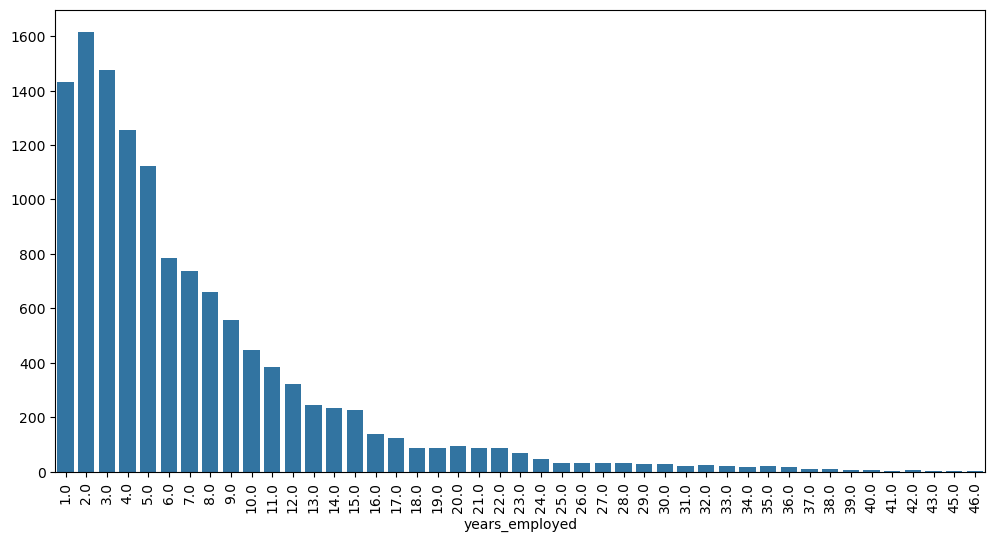

In [43]:
agg = df.loc[df['NAME_INCOME_TYPE'] != 'Pensioner', 'years_employed'].value_counts()
plt.figure(figsize = (12,6))
# agg = df['years_employed'].value_counts()
sns.barplot(x=agg.index, y=agg.values)
plt.xticks(rotation = 90)

In [35]:
df['DAYS_EMPLOYED'].value_counts()

DAYS_EMPLOYED
 365243    2711
-118         14
-161         13
-194         12
-287         12
           ... 
-3106         1
-322          1
-65           1
-4375         1
-2107         1
Name: count, Length: 5237, dtype: int64